# AwkwardNN

### Creating Yaml file from Root file


In [1]:
from awkwardNN.nets.awkwardNN import awkwardNN_fromYaml

root_filename = "../data/test_ttbar_1000.root"
yaml_filename = "../test_qcd_1000_default.yaml"

kwargs = {'embed_dim': 64, 'fixed_mode': 'mlp', 'hidden_sizes':'(64, 64)', 'jagged_mode': 'lstm'}

awkwardNN_fromYaml.create_yaml_file_from_rootfile(root_filename,
                                                  yaml_filename,
                                                  **kwargs)

/Users/edisonweik/.pyenv/versions/3.6.11/lib/python3.6/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return cls.numpy.array(value, copy=False)


### Visualizing Awkward NN

I won't use the yaml file created above here because the network
would look really large. An image of the AwkwardNN associated
with `test_qcd_1000_default.yaml` is available on the github
page as "default.png"


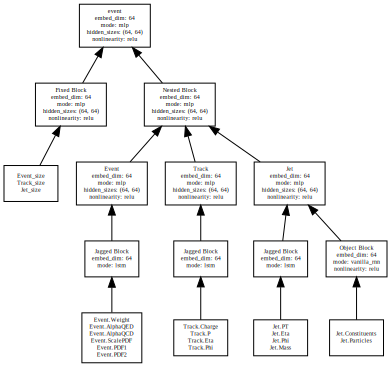

In [2]:
from awkwardNN.visualize_network import visualize_network
import awkwardNN.utils.yaml_utils as yaml_utils
yaml_filename = '../test_qcd_1000_demo.yaml'
yaml_dict = yaml_utils.get_yaml_dict_list(yaml_filename)
graph = visualize_network(yaml_dict, fontsize=6)
graph



### Training Awkward NN


In [3]:
from awkwardNN.nets.awkwardNN import awkwardNN_fromYaml

yaml_filename = '../test_qcd_1000_demo.yaml'


data_info = [{'rootfile': '../data/test_qcd_1000.root', 'target': 0},
            {'rootfile': '../data/test_ttbar_1000.root', 'target': 1}]

model1 = awkwardNN_fromYaml(yaml_filename,
                            max_iter=25,
                            verbose=True,
                            model_name='awkwardNN_demo')
model1.train(data_info)


/Users/edisonweik/.pyenv/versions/3.6.11/lib/python3.6/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return cls.numpy.array(value, copy=False)



Epoch: 1/25
Train Epoch: 1 [180/1800 (10%)] 	Loss: 0.751345	Acc: 0%
Train Epoch: 1 [360/1800 (20%)] 	Loss: 0.690167	Acc: 56%
Train Epoch: 1 [540/1800 (30%)] 	Loss: 0.685319	Acc: 54%
Train Epoch: 1 [720/1800 (40%)] 	Loss: 0.711144	Acc: 44%
Train Epoch: 1 [900/1800 (50%)] 	Loss: 0.696486	Acc: 43%
Train Epoch: 1 [1080/1800 (60%)] 	Loss: 0.695980	Acc: 47%
Train Epoch: 1 [1260/1800 (70%)] 	Loss: 0.696392	Acc: 51%
Train Epoch: 1 [1440/1800 (80%)] 	Loss: 0.696182	Acc: 48%
Train Epoch: 1 [1620/1800 (90%)] 	Loss: 0.685434	Acc: 56%
Train Epoch: 1 [1800/1800 (100%)] 	Loss: 0.691312	Acc: 54%

Valid set - epoch 1:
    Avg. loss: 0.6980, Accuracy: 92/200 (46%) [*]

Epoch: 2/25
Train Epoch: 2 [180/1800 (10%)] 	Loss: 0.833530	Acc: 0%
Train Epoch: 2 [360/1800 (20%)] 	Loss: 0.689264	Acc: 53%
Train Epoch: 2 [540/1800 (30%)] 	Loss: 0.671517	Acc: 64%
Train Epoch: 2 [720/1800 (40%)] 	Loss: 0.692227	Acc: 54%
Train Epoch: 2 [900/1800 (50%)] 	Loss: 0.697794	Acc: 49%
Train Epoch: 2 [1080/1800 (60%)] 	Loss: 0.6

### Evaluating Awkward NN

#### Validation loss function and accuracy

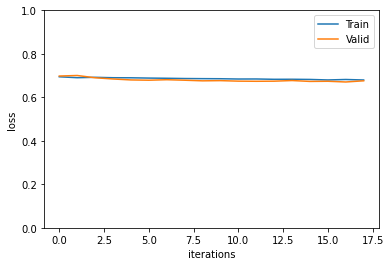

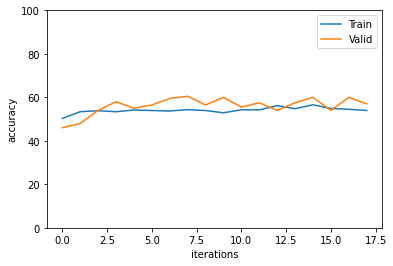

In [4]:
import matplotlib.pyplot as plt

def plot_loss_acc(train_loss, train_acc, valid_loss, valid_acc):
    plt.plot(train_loss, label='Train')
    plt.plot(valid_loss, label='Valid')
    plt.ylim([0, 1])
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.plot(train_acc, label='Train')
    plt.plot(valid_acc, label='Valid')
    plt.ylim([0, 100])
    plt.xlabel("iterations")
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()

train_loss = model1._train_losses
train_acc = model1._train_accs
valid_loss = model1._valid_losses
valid_acc = model1._valid_accs
plot_loss_acc(train_loss, train_acc, valid_loss, valid_acc)


#### ROC curve

/Users/edisonweik/.pyenv/versions/3.6.11/lib/python3.6/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return cls.numpy.array(value, copy=False)


[*] Loading model from ./ckpt/awkwardNN_demo/
[*] Loaded awkwardNN_demo_model_best.pth checkpoint @ epoch 8 with best valid acc of 60.500
[*] Loading model from ./ckpt/awkwardNN_demo/
[*] Loaded awkwardNN_demo_model_best.pth checkpoint @ epoch 8 with best valid acc of 60.500


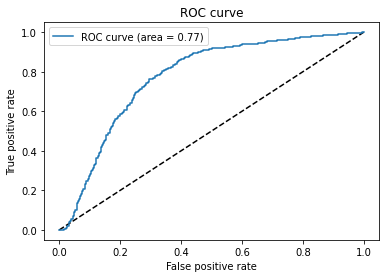

In [12]:
import numpy as np
from sklearn import metrics

# load model
yaml_filename = '../test_qcd_1000_demo.yaml'
model_to_test = awkwardNN_fromYaml(yaml_filename,
                                   verbose=True,
                                   model_name='awkwardNN_demo')

# make predictions on data
scores1 = model_to_test.predict_proba('../data/test_qcd_1000.root')[:, :, 1]
scores2 = model_to_test.predict_proba('../data/test_ttbar_1000.root')[:, :, 1]
scores = np.concatenate((scores1, scores2))
y1 = np.zeros(1000)
y2 = np.ones(1000)
y = np.concatenate((y1, y2))

# create roc curve
fpr, tpr, _ = metrics.roc_curve(y, scores)
auc = metrics.auc(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

